In [2]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import *
from scipy.stats import *
from sklearn.metrics import mean_squared_error as msq
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("forestfires.csv")
df.shape

(517, 13)

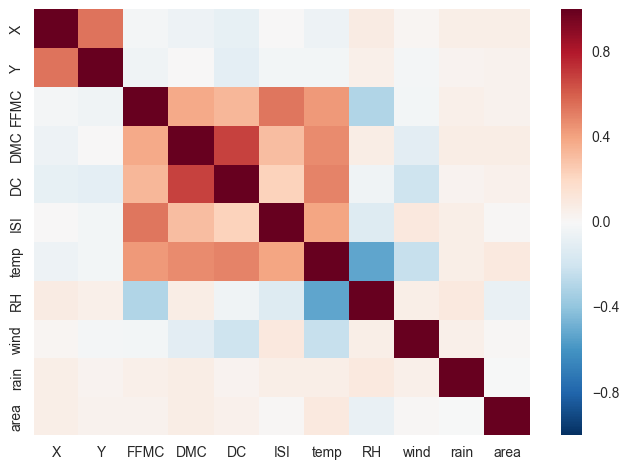

In [22]:
import seaborn as sns
CorrKoef = df.corr()
sns.heatmap(CorrKoef, annot=False)
plt.show()

In [15]:
# Area почти ни с чем не коррелирует

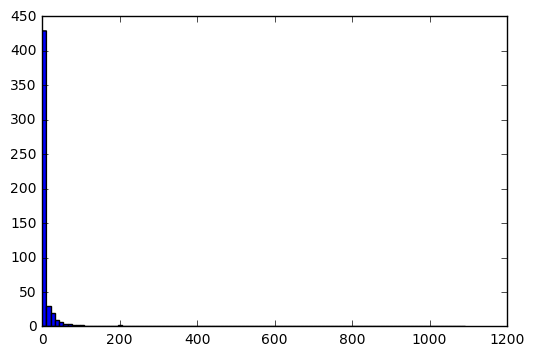

In [4]:
# Плотность целевой переменной
plt.hist(df.area, bins=100)
#xlim(0, 500)
plt.show()

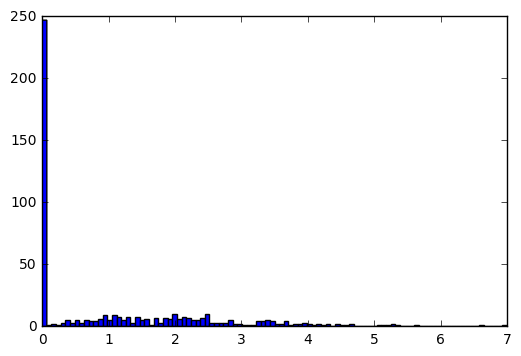

In [7]:
# Плотность логарифма целевой переменной
plt.hist(np.log(df.area + 1), bins=100)
#xlim(0, 500)
plt.show()

In [44]:
# Можно заменить месяц, на долю пожаров в этот месяц (мы так делать, конечно, не будем)
df.groupby('month').count()

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,count
month,,,,,,,,,,,,,
apr,9,9,9,9,9,9,9,9,9,9,9,9,9
aug,184,184,184,184,184,184,184,184,184,184,184,184,184
dec,9,9,9,9,9,9,9,9,9,9,9,9,9
feb,20,20,20,20,20,20,20,20,20,20,20,20,20
jan,2,2,2,2,2,2,2,2,2,2,2,2,2
jul,32,32,32,32,32,32,32,32,32,32,32,32,32
jun,17,17,17,17,17,17,17,17,17,17,17,17,17
mar,54,54,54,54,54,54,54,54,54,54,54,54,54
may,2,2,2,2,2,2,2,2,2,2,2,2,2


In [23]:
# Вместо этого посчитаем likelihood признаки 
df = pd.read_csv("forestfires.csv")
# Месяц заменим на средний размер пожаров в этом месяце
likelihood = pd.DataFrame(df.groupby('month')['area'].mean())
likelihood.columns = ['count']
likelihood['month'] = likelihood.index
df = pd.merge(df, likelihood, on="month", how="left")
# День заменим на средний размер пожаров в этот день
likelihood = pd.DataFrame(df.groupby('day')['area'].mean())
likelihood.columns = ['count']
likelihood['day'] = likelihood.index
df = pd.merge(df, likelihood, on="day", how="left")
del df['month']
del df['day']
y = df['area']
del df['area']
df['val_0'] = 1
df[:10]

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,count_x,count_y,val_0
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,4.356667,5.261647,1
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,6.638000,12.621719,1
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,6.638000,25.534048,1
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,4.356667,5.261647,1
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,4.356667,10.104526,1
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,12.489076,10.104526,1
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,12.489076,9.547703,1
7,8,6,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,12.489076,9.547703,1
8,8,6,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,17.942616,12.621719,1
9,7,5,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,17.942616,25.534048,1


In [10]:
# Линейная регрессия
class lin_mod:
    # Подбор весов
    def fit(self, X, y):
        self.weights = np.dot(np.dot(linalg.inv(np.dot(X.T, X)), X.T), y)
    # Предсказание
    def predict(self, X):
        return np.dot(X, self.weights)

In [11]:
# Посчитаем ошибку предсказания для разных рандом сидов
arr = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=i)
    x = lin_mod()
    x.fit(X_train, y_train)
    print msq(x.predict(X_test), y_test)
    arr += [msq(x.predict(X_test), y_test)]

8108.07798913
3915.98499836
1154.7782578
4234.16168127
3736.50333497
7561.96002511
873.140146701
1492.42941329
4061.48564734
1857.56174918


In [12]:
print 'std: ', np.array(arr).std()
print 'mean: ', np.array(arr).mean()

std:  2398.89776352
mean:  3699.60832432


Дикий разброс

In [17]:
# Попробуем регрессию из библиотеки
arr = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=i)
    x = LinearRegression()
    x.fit(X_train, y_train)
    print msq(x.predict(X_test), y_test)
    arr += [msq(x.predict(X_test), y_test)]

8108.07798913
3915.98499836
1154.7782578
4234.16168127
3736.50333497
7561.96002511
873.140146701
1492.42941329
4061.48564734
1857.56174918


Результаты не отличаются

In [21]:
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df))
arr = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=i)
    x = LinearRegression()
    x.fit(X_train, y_train)
    print msq(x.predict(X_test), y_test)
    arr += [msq(x.predict(X_test), y_test)]

8108.07798913
3915.98499836
1154.7782578
4234.16168127
3736.50333497
7561.96002511
873.140146701
1492.42941329
4061.48564734
1857.56174918


In [85]:
# Попробуем бустинг деревьевв
import xgboost as xgb
x = xgb.XGBRegressor(max_depth=2, learning_rate=0.001,
             n_estimators=1000,
             silent=True,
             objective='reg:linear', 
             nthread=-1,
             gamma=0,
             min_child_weight=100,
             #max_delta_step=0,
             subsample=1.0,
             #colsample_bytree=1,
             #colsample_bylevel=1,
             #reg_alpha=0,
             #reg_lambda=1,
             #scale_pos_weight=1,
             base_score=0.5,
             seed=1,
             missing=None)
# Посчитаем ошибку предсказания для разных рандом сидов
arr = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=i)
    x.fit(X_train, y_train)
    print msq(x.predict(X_test), y_test)
    arr += [msq(x.predict(X_test), y_test)]

8290.49895249
3948.78053273
981.193167661
4390.4475243
3748.21115502
7701.82775857
678.461287106
1404.70808254
4125.55973764
1920.88829461


In [84]:
print 'std: ', np.array(arr).std()
print 'mean: ', np.array(arr).mean()

std:  2505.21295057
mean:  3719.05764927


Тоже плохо

In [37]:
# Преобразуем таргет
loss = []
best = 50000000
best_c = 0
for c in np.linspace(0.1, 1000, 40):   
    log_y = np.log(y+c)
    arr = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(df, log_y, test_size=0.3, random_state=i)
        x = lin_mod()
        x.fit(X_train, y_train)
        arr += [msq(np.exp(x.predict(X_test)) - c, np.exp(y_test)-c)]
    #print 'std: ', np.array(arr).std()
    print 'mean: ', np.array(arr).mean()
    loss += [np.array(arr).mean()]
    if(np.array(arr).mean() < best):
        best = np.array(arr).mean()
        best_c = c

mean:  3849.59595295
mean:  3717.43647513
mean:  3695.40585021
mean:  3684.23153258
mean:  3677.44680828
mean:  3672.96924567
mean:  3669.87621974
mean:  3667.6843223
mean:  3666.11197887
mean:  3664.98267648
mean:  3664.17961842
mean:  3663.62225474
mean:  3663.25318833
mean:  3663.03042677
mean:  3662.92257453
mean:  3662.90573078
mean:  3662.96142081
mean:  3663.0751778
mean:  3663.23554678
mean:  3663.43337028
mean:  3663.66126677
mean:  3663.91324339
mean:  3664.18440452
mean:  3664.47072939
mean:  3664.7689006
mean:  3665.07617041
mean:  3665.39025555
mean:  3665.70925371
mean:  3666.03157677
mean:  3666.35589698
mean:  3666.68110335
mean:  3667.00626604
mean:  3667.33060719
mean:  3667.65347683
mean:  3667.97433293
mean:  3668.29272482
mean:  3668.60827931
mean:  3668.92068907
mean:  3669.22970283
mean:  3669.53511715


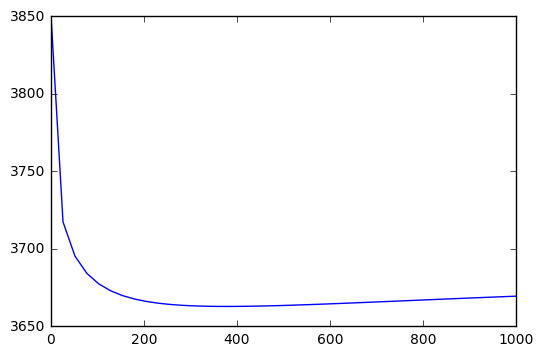

In [36]:
# Ошибка в зависимости от сдвига
plt.plot(np.linspace(0.1, 1000, 40),loss)
plt.show()

In [58]:
# Лучшее смещение
print "Лучшее смещение", best_c
print "Лучшее скор", best

Лучшее смещение 384.676923077
Лучшее скор 3662.90573078


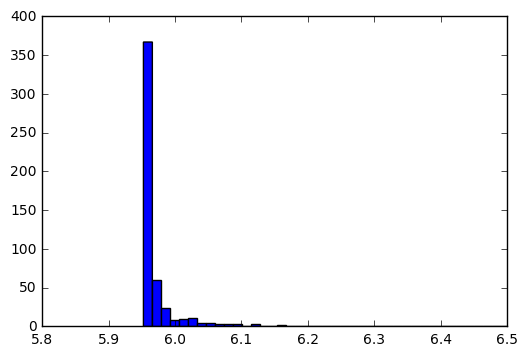

In [62]:
plt.hist(np.log(y+best_c), bins=100)
xlim(5.8, 6.5)
plt.show()

# Вывод
Результаты для разных разбиений сильно отличались. После логарифмирования таргета скор улучшился. Странно, что бустинг деревьев работал хуже линейной регрессии